# Image Processing 
![transform](ImageProcessing.jpg)

This jupyter notebook explains how following libraries can be used to work with images. This is mainly in context of deep learning, so we can manipulate images and store/save into numpy array.
- opencv-python
- scikit-image


### 1.> Lets load required libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, img_as_ubyte
from skimage.transform import resize

### 2.> Load and print all images as is

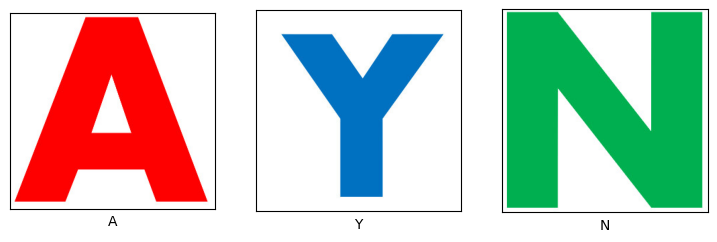

In [4]:
# Define function to plot image so we can call this function again and again 
def plot_images(img1, img2, img3, cmapValue):
    # Define printing area of 9 inch wide, and 3 inch high.
    plt.figure(figsize=(9, 3))

    # Plot imgA at first row first column.
    plt.subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img1, cmapValue)
    plt.xlabel('A')

    # Plot imgY at first row second column.
    plt.subplot(1, 3, 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img2, cmapValue)
    plt.xlabel('Y')

    # Plot imgN at first row third column.
    plt.subplot(1, 3, 3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img3, cmapValue)
    plt.xlabel('N')

    # Display image using Matplotlib
    plt.show()


# Load the image using skimage.io
imgA = io.imread('A.jpg')
imgY = io.imread('Y.jpg')
imgN = io.imread('N.jpg')


# Call function to plot all loaded image as is
plot_images(imgA, imgY, imgN, 'viridis')



### 3.> Convert loaded image into greyscale, and print greyscale image.

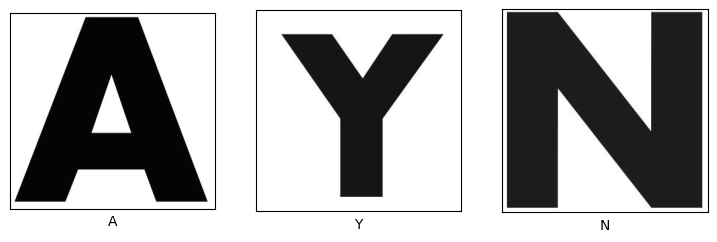

In [5]:
# Convert the image to grayscale
gray_imgA = color.rgb2gray(imgA)
gray_imgY = color.rgb2gray(imgY)
gray_imgN = color.rgb2gray(imgN)

# Call function to plot all gray image
plot_images(gray_imgA, gray_imgY, gray_imgN, 'gray')



### 4.> Reduce image size, and save into another files.

In [6]:
# Write function, to reduce image to specified pixel size and save to given file name.
def transform_image_and_save(img, pixelSize, fileName):
    transformedImage = transform.resize(img, (pixelSize, pixelSize), anti_aliasing=True)
    
    # Assume transformedImage is your floating-point image
    # Scale and convert the image to 8-bit unsigned integers
    transformed_image_ubyte = img_as_ubyte(transformedImage)
    
    io.imsave(fileName, transformed_image_ubyte)




# Make image to 150 pixel size and save.
pixelSize = 150
transform_image_and_save(gray_imgA, pixelSize, 'A_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgY, pixelSize, 'Y_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgN, pixelSize, 'N_resized_'+str(pixelSize)+'.jpg')


# Make image to 100 pixel size and save.
pixelSize = 100
transform_image_and_save(gray_imgA, pixelSize, 'A_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgY, pixelSize, 'Y_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgN, pixelSize, 'N_resized_'+str(pixelSize)+'.jpg')

# Make image to 50 pixel size and save.
pixelSize = 50
transform_image_and_save(gray_imgA, pixelSize, 'A_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgY, pixelSize, 'Y_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgN, pixelSize, 'N_resized_'+str(pixelSize)+'.jpg')

# Make image to 10 pixel size and save.
pixelSize = 10
transform_image_and_save(gray_imgA, pixelSize, 'A_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgY, pixelSize, 'Y_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgN, pixelSize, 'N_resized_'+str(pixelSize)+'.jpg')


### 5.> Increase image resolution

In [7]:
# We can also increase image resolution by giving more pixel size.
pixelSize = 500
transform_image_and_save(gray_imgA, pixelSize, 'A_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgY, pixelSize, 'Y_resized_'+str(pixelSize)+'.jpg')
transform_image_and_save(gray_imgN, pixelSize, 'N_resized_'+str(pixelSize)+'.jpg')


### 6.> Append all greyscale images into numpy array and save as .npy file


In [8]:
# Initialize an empty list to store grayscale images
grayscale_images = []


pixelSize = 100
grayscale_images.append(transform.resize(gray_imgA, (pixelSize, pixelSize), anti_aliasing=True))
grayscale_images.append(transform.resize(gray_imgY, (pixelSize, pixelSize), anti_aliasing=True))
grayscale_images.append(transform.resize(gray_imgN, (pixelSize, pixelSize), anti_aliasing=True))

# Convert the list of grayscale images to a numpy array
np_images_array = np.array(grayscale_images)

# Save the array of grayscale images to a .npy and .txt file
np.save('image_array.npy', np_images_array)

# This can also be saved as txt file
#np.savetxt('image_array.txt', np_images_array.reshape(-1, np_images_array.shape[-1]), fmt='%f') 


### 7.> Read .npy file and save it as .txt file.

In [9]:
loaded_array = np.load('image_array.npy')
np.savetxt('image_array.txt', loaded_array.reshape(-1, loaded_array.shape[-1]), fmt='%f') 

In [10]:
loaded_array.shape

(3, 100, 100)

In [11]:
loaded_array = np.loadtxt('image_array.txt')
loaded_array.shape

(300, 100)

### 8. ASCII art

In [12]:
# Function that will return ascii character based on given pixel intensity on gray scale
def getAsciiForPixelIntensity(pixelValue):

    # Collection of 92 printable ascii ordered based on their intensity.
    asciiCollection =" `.-':_,^=;><+!rc*/z?sLTv)J7(|Fi{C}fI31tlu[neoZ5Yxjya]2ESwqkP6h9d4VpOGbUAKXHm8RD#$Bg0MNWQ%&@"

    # Reverse input pixel value.
    # In python, pixel 1 mean light and 0 mean dark. Above 92 ascii is arranged in order from light to dark.
    # Hence we need to subtract input pixelValue from 1 to get right intensity index position from array.
    pixelFloatValue = 1.000000 - pixelValue
    
    # // is mathematical operator which will find quotient of divition.
    # Pixel float values are of 6 digits after decimal.
    # 10 to the power 6 when devide by 92 equal parts, it comes down to 10870 approximatly.
    # So 10870 different level of intensity represents 1 single character in array, hence devide by 10870
    asciiIndex = int((pixelFloatValue * 1000000 ) // 10870)

    return asciiCollection[asciiIndex]






pixelFloatValue = 1.000000  # Light
pixelFloatValue = 0.000000  # Darkest
pixelFloatValue = 0.897497  # Something in between



print(getAsciiForPixelIntensity(pixelFloatValue))


=


In [13]:
# Function which will read float values file and create ascii characters file having float value equivelent ascii.
def createAsciiFileFromFloatFile(floatFileName, asciiFileName):
    try:
        # Open read file
        with open(floatFileName, 'r') as read_file:
            
            # Open the write file
            with open(asciiFileName, 'w') as write_file:

                # Read each line from read file 
                for line in read_file:
                    # Split the line into individual string components
                    float_strings = line.split()    # This will split each line on space and create list of float values in string format.

                    # Convert each float to its equivelent ascii character
                    for float_string in float_strings:
                       float_value = float(float_string)
                       asciiChar = getAsciiForPixelIntensity(float_value)
                       write_file.write(asciiChar)  # Write the character to the write file

                    # After one line, print new line character
                    write_file.write('\n')  

    except FileNotFoundError:
        print("The file to read was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")





createAsciiFileFromFloatFile('image_array.txt','ascii_image_array.txt')


In [14]:
testStr = "1.000000 1.000000 1.000000 1.000000 1.000000 1.000000"
float_strings = testStr.split()
print(float_strings)

['1.000000', '1.000000', '1.000000', '1.000000', '1.000000', '1.000000']


In [15]:
from PIL import Image
from skimage import color

def reduce_resolution(image_path, output_path):
    # Open the image
    img = Image.open(image_path)

    # Convert to gray
    img = img.convert('L')

    # Get the current size
    width, height = img.size

    # Calculate the new size
    new_width = width // 2
    new_height = height // 2

    # Resize the image
    resized_img = img.resize((new_width, new_height))

    # Save the resized image
    resized_img.save(output_path, "PNG")

# Example usage
folderPath = "C:\\Users\\maddy\\Dropbox\\CHANGES_BKP_PNDRV\\Notes & Documents\\AWS\\04. MachineLearningSpeciality\\01.Mike-G-Chambers\\WL\\PT-00\\Questions"
reduce_resolution(folderPath + "\\01.png", folderPath + "\\01b.png")
